In [30]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [31]:
# Constants
Q = 10    # source emission rate (kg/s)
U = 3     # wind speed (m/s)
H = 0
min_concentration = 9*10**(-7)
x0, y0, z0 = 500, 0, 0
z_0 = 1

# Grid
rmax = 4000  # size of domain in r (m)
ymax = 2000  # size of domain in y (m)
N = 2000     # number of plotting points

In [32]:
# Определение устойчивости атмосферы
def classify_atmospheric_stability(U: int):
    ''''''
    if U < 2:
        return "B"
    elif U < 5:
        return "C"
    else:
        return "D"

In [33]:
def classify_consts_a(atmospheric_stability):
    '''(a_1, a_2)'''
    match atmospheric_stability:
        case "A":
            pass
        case "B":
            return (0.13, 0.000652)
        case "C":
            return (0.112, 0.000905)
        case "D":
            return (0.098, 0.00135)
        case "E":
            pass
        case "F":
            pass 

In [ ]:
def classify_consts_b(atmospheric_stability):
    '''(b_1, b_2)'''
    match atmospheric_stability:
        case "A":
            pass
        case "B":
            return (0.95, 0.75)
        case "C":
            return (0.92, 0.718)
        case "D":
            return (0.889, 0.688)
        case "E":
            pass
        case "F":
            pass 


DISPERSION_COEFFICIENTS = {
    "A": {"a": (), "b": ()},
    "B": {"a": (0.13, 0.000652),  "b": (0.95, 0.75)},
    "C": {"a": (0.112, 0.000905), "b": (0.92, 0.718)},
    "D": {"a": (0.098, 0.00135),  "b": (0.889, 0.688)},
    "E": {"a": (), "b": ()},
    "F": {"a": (), "b": ()},
}

In [35]:
def classify_consts_с(atmospheric_stability):
    '''(c_1, c_2, c_3)'''
    match atmospheric_stability:
        case "A":
            pass
        case "B":
            return (7.37, 4290, 0.24)
        case "C":
            return (7.37, 4290, 0.17)
        case "D":
            return (7.37, 4290, 0.12)
        case "E":
            pass
        case "F":
            pass 

In [36]:
def classify_consts_d(atmospheric_stability):
    '''(d_1, d_2)'''
    match atmospheric_stability:
        case "A":
            pass
        case "B":
            return (-0.0957, -0.6)
        case "C":
            return (-0.0957, -0.6)
        case "D":
            return (-0.0957, -0.6)
        case "E":
            pass
        case "F":
            pass 

In [37]:
'''(a1, a2, b1, b2, c1, c2, c3, c4, d1, d2)'''

# a1 = 0.112
# a2 = 5.38**(-4)
# b1 = 1.06

# c1 = 7.37
# c2 = 4.29*10**3
# d1 = -0.0957
# d2 = -0.6

# c3, c4 = 0.33, 1.5
atmospheric_stability = classify_atmospheric_stability(U)
a1, a2 = classify_consts_a(atmospheric_stability)
b1, b2 = classify_consts_b(atmospheric_stability)
c1, c2, c3 = classify_consts_с(atmospheric_stability)
d1, d2 = classify_consts_b(atmospheric_stability)

def calc_dy(x):
    return (c3*x)/((1+c4*10**(-4)*x)**(1/2))

def F(x):
    if z0 <= 0.1:
        return np.log(c1*(x**d1)*(1 + (c2*x**d2)**(-1)))
    else:
        return np.log(c1*(x**d1)*((1 + c2*x**d2)**(-1)))

def g(x):
    return (a1*x**b1)/(1+a2*x**d2)

vg = 0

def calc_dz(x):
    return (F(x)*g(x))/((1 + vg**2)**(1/2))

In [38]:
def gauss_func(x, y, z, atmospheric_stability):
    
    dy, dz = calc_dy(x), calc_dz(x)#calculate_plume_dispersion(x, atmospheric_stability)

    a = Q/(2*np.pi*U*dy*dz)
    b = np.exp((-(y-y0)**2)/(2*dy**2))
    c = np.exp((-(z-H)**2)/(2*dz**2))
    d = np.exp((-(z+H)**2)/(2*dz**2))
    return a*b*(c+d)

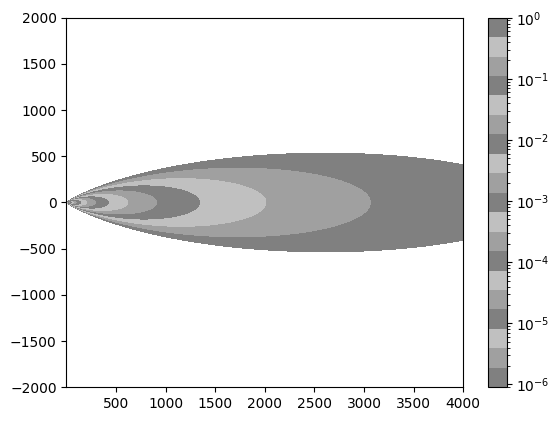

1.4318445698533726e-08
-0.0


In [39]:
lev = list(np.geomspace(min_concentration, 1, 20))


rr, yy = np.meshgrid(np.linspace(0.005, rmax, N), np.linspace(-ymax, ymax, 2*N))
cc = gauss_func(rr,yy, 1, atmospheric_stability)

cs = plt.contourf(rr, yy, cc, lev, colors=['#808080', '#A0A0A0', '#C0C0C0'])
plt.axis('off')
plt.savefig('test.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()
print(cc[1000][1000])
print(cc[1000][0])


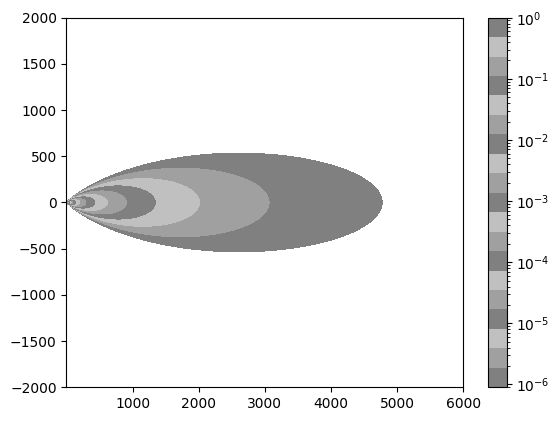

1.1981168128725645e-07
-0.0


In [40]:
rmax = 6000
lev = list(np.geomspace(min_concentration, 1, 20))

rr, yy = np.meshgrid(np.linspace(0.005, rmax, N), np.linspace(-ymax, ymax, 2*N))
cc = gauss_func(rr,yy, 1, atmospheric_stability)

cs = plt.contourf(rr, yy, cc, lev, colors=['#808080', '#A0A0A0', '#C0C0C0'])
plt.axis('off')
plt.savefig('test.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()
print(cc[1000][1000])
print(cc[1000][0])
